<a href="https://colab.research.google.com/github/mk688/IntroToProg-Python/blob/master/VisualizeDose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
# Run it only once to mount the google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Upload output.txt file which contains the scored dose

from google.colab import files
uploaded = files.upload()

print(uploaded)

Saving output1.txt to output1.txt
{'output1.txt': b'220 H2O521ICRU     1.000     0.0000 2.6077e-006 +/- 3.139  % 2.6110e-010 +/- 3.139  %\r\n226 H2O521ICRU     1.000     0.0000 4.5703e-006 +/- 3.394  % 9.1519e-011 +/- 3.394  %\r\n232 H2O521ICRU     1.000     0.0000 2.3503e-006 +/- 4.503  % 4.7064e-011 +/- 4.503  %\r\n238 H2O521ICRU     1.000     0.0000 1.4609e-006 +/- 5.715  % 2.9255e-011 +/- 5.715  %\r\n244 H2O521ICRU     1.000     0.0000 9.6973e-007 +/- 7.043  % 1.9419e-011 +/- 7.043  %\r\n250 H2O521ICRU     1.000     0.0000 8.3084e-007 +/- 8.029  % 1.6638e-011 +/- 8.029  %\r\n256 H2O521ICRU     1.000     0.0000 4.6151e-007 +/- 10.920 % 9.2417e-012 +/- 10.920 %\r\n262 H2O521ICRU     1.000     0.0000 3.0958e-007 +/- 12.744 % 6.1993e-012 +/- 12.744 %\r\n268 H2O521ICRU     1.000     0.0000 2.4649e-007 +/- 14.984 % 4.9359e-012 +/- 14.984 %\r\n274 H2O521ICRU     1.000     0.0000 1.5332e-007 +/- 16.533 % 3.0702e-012 +/- 16.533 %\r\n280 H2O521ICRU     1.000     0.0000 9.3916e-008 +/- 26.089

In [20]:
# Read output file from the EGSnrc program "Summary of region dosimetry per particle"
# Save the output file as "output.txt"

dicRow = {}
DoseTable = []

objFile = open('output1.txt','r')
for row in objFile:
  lstRow = row.split()
  dicRow = {"ir": int(lstRow[0]), "Dose Scored": float(lstRow[8])}
  DoseTable.append(dicRow)
objFile.close()


In [ ]:
# Get user input for the location of the corresponding ir in order (from top to bottom in the output file)
Location = []
for each in DoseTable:
  EachLocation = float(input("Enter the location in mm for each ir "))
  Location.append(EachLocation)

normIndex = Location.index(2)


In [72]:
# Normalize the dose such that Dose @ 2mm = 100%
normDose = DoseTable[normIndex]['Dose Scored']

normDoseTable = []
for each in DoseTable:
  normDoseEach = (each['Dose Scored']/normDose)*100
  normDoseTable.append(normDoseEach)

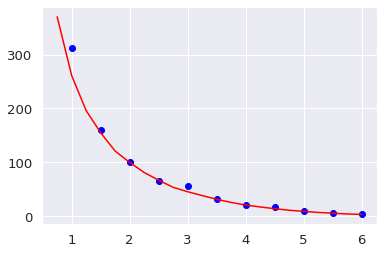

In [92]:
# Plot normDoseTable (y-axis) vs. Location (x-axis)
indices = [i for i in range(len(normDoseTable)) if normDoseTable[i]>400] 
LocationPlot = Location
normDoseTablePlot = normDoseTable
if indices:
  for each in indices:
    del LocationPlot[each]
    del normDoseTablePlot[each]

# Published PDD for Sr-90
xaxis = np.linspace(0.75, 6.0, 22, endpoint = True, retstep = False, dtype = None, axis =0 )
yaxis = [370, 261, 196, 155, 121, 100, 81.3, 67.1, 53.8, 45.6, 38.5, 31.6, 25.8, 20.9, 17.4, 14.2, 11.3, 9.2, 7.22, 5.83, 4.42, 3.54]

plt.plot(LocationPlot, normDoseTablePlot, 'o', color='blue')
plt.plot(xaxis, yaxis, color='red')
plt.show()


In [87]:
## TEST COMMAND 
#print(normDoseTable)
#indices = [i for i in range(len(normDoseTable)-1) if normDoseTable[i]>400]
#print(indices)

len(xaxis)

22